<a href="https://colab.research.google.com/github/fredtush/Data-Presentation-Lab/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load the data 
df = pd.read_csv("/content/Mall_Customers.xls")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
data = df.iloc[:, [3,4]].values

In [ ]:
# importing the kmeans from sklearn
from sklearn.cluster import KMeans

In [ ]:
wcss = [] # empty list 
for cluster in range(1, 11):
  kmeans = KMeans(n_clusters=cluster, init="k-means++", n_init=10, random_state = 42)
  kmeans.fit(data)

  wcss.append(kmeans.inertia_)

In [ ]:
wcss 

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21850.165282585636,
 19672.072849014323]

In [ ]:
import matplotlib.pyplot as plt

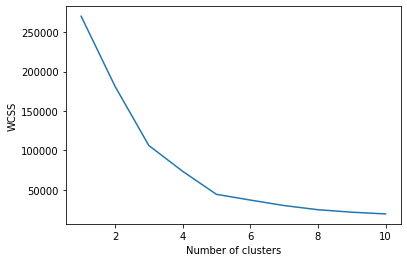

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
Daniel = KMeans(n_clusters=3, init="k-means++", random_state = 42)
daniel_points = Daniel.fit_predict(data)
print(daniel_points)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [ ]:
Rachael = KMeans(n_clusters=5, init="k-means++", random_state = 42)
rachael_points = Rachael.fit_predict(data)
print(rachael_points)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


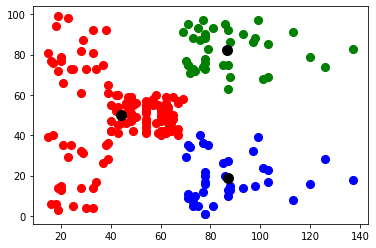

In [ ]:
plt.scatter(data[daniel_points ==0,0], data[daniel_points == 0,1], s = 65, c="red", label = "Clutter 1")
plt.scatter(data[daniel_points ==1,0], data[daniel_points == 1,1], s = 65, c="blue", label = "Cluster 2")
plt.scatter(data[daniel_points ==2,0], data[daniel_points == 2,1], s = 65, c="green", label = "Cluster 3")
plt.scatter(Daniel.cluster_centers_[:, 0], Daniel.cluster_centers_[:, 1], s = 100, c = "black", label = "Centroid")

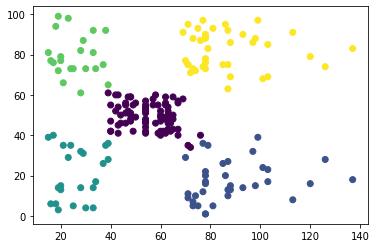

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = rachael_points)

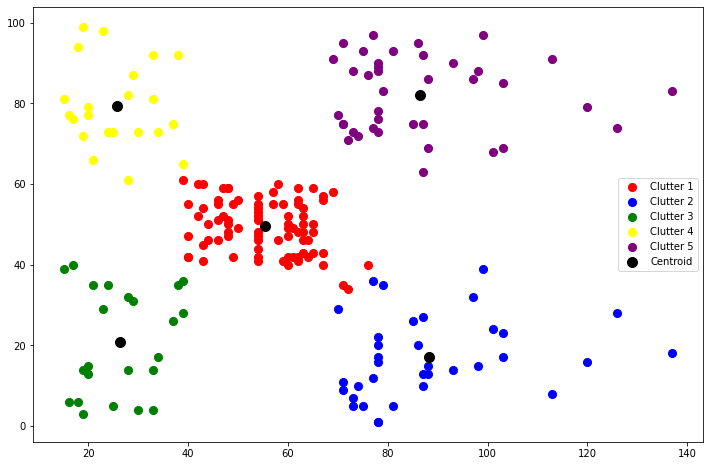

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(data[rachael_points ==0,0], data[rachael_points == 0,1], s = 65, c="red", label = "Clutter 1")
plt.scatter(data[rachael_points ==1,0], data[rachael_points == 1,1], s = 65, c="blue", label = "Clutter 2")
plt.scatter(data[rachael_points ==2,0], data[rachael_points == 2,1], s = 65, c="green", label = "Clutter 3")
plt.scatter(data[rachael_points ==3,0], data[rachael_points == 3,1], s = 65, c="yellow", label = "Clutter 4")
plt.scatter(data[rachael_points ==4,0], data[rachael_points == 4,1], s = 65, c="purple", label = "Clutter 5")


plt.scatter(Rachael.cluster_centers_[:, 0], Rachael.cluster_centers_[:, 1], s = 100, c = "black", label = "Centroid")
plt.legend()

In [ ]:
new_df = pd.DataFrame(data, columns = ['Annual Income (k$)',
       'Spending Score (1-100)'])
new_df["cluster"] = Rachael.labels_
new_df.groupby("cluster")['Annual Income (k$)','Spending Score (1-100)'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,Annual Income (k$),Spending Score (1-100)
cluster,,
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205
